In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [6]:
tf.random.set_seed(42)

n_samples = 50000

# Independent variables
x1 = tf.random.normal(shape=(n_samples,), mean=0, stddev=1)
x2 = tf.random.normal(shape=(n_samples,), mean=5, stddev=2)
x3 = tf.random.normal(shape=(n_samples,), mean=10, stddev=3)

# Dependent variable
noise = tf.random.normal(shape=(n_samples,), mean=0, stddev=1)
Y = 3*x1 + 2*x2 - x3+noise

# Create a dataframe
data = pd.DataFrame({
    'x1': x1.numpy(),
    'x2': x2.numpy(),
    'x3': x3.numpy(),
    'Y': Y.numpy()
})

# Display the first few rows and the size of the dataset
print(data.head())
print(f"Dataset size: {data.shape}")

         x1        x2         x3          Y
0  0.327469  5.168449   8.322708   3.653083
1 -0.842626  3.278193   8.395836  -4.780380
2  0.319434  5.756246  17.119099  -4.308331
3 -1.407552  4.989607   5.282221  -0.531289
4 -2.388060  4.010936  12.416517 -10.856162
Dataset size: (50000, 4)


In [7]:
# Spliting the data into features and target
X = data[['x1', 'x2', 'x3']].values
y = data['Y'].values

In [8]:
# Spliting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [9]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [10]:
# BUild the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)

])

model.compile(optimizer='Adam', loss='mae', metrics='mae')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
313/313 [==============================] - 6s 6ms/step - loss: 1.1823 - mae: 1.1823
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8329 - mae: 0.8329
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8396 - mae: 0.8396
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8330 - mae: 0.8330
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8251 - mae: 0.8251
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8273 - mae: 0.8273
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8259 - mae: 0.8259
Epoch 8/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8217 - mae: 0.8217
Epoch 9/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8240 - mae: 0.8240
Epoch 10/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8224 - mae: 0.8224
Epoch 11/100
313/313 [=================

In [11]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

1250/1250 [==============================] - 4s 3ms/step - loss: 0.8348 - mae: 0.8348
Test MAE: 0.8348


In [13]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1250/1250 [==============================] - 3s 3ms/step


array([[ 1.0362357],
       [ 5.3252845],
       [ 3.9169   ],
       ...,
       [-1.6162829],
       [-2.0402193],
       [ 2.4798846]], dtype=float32)

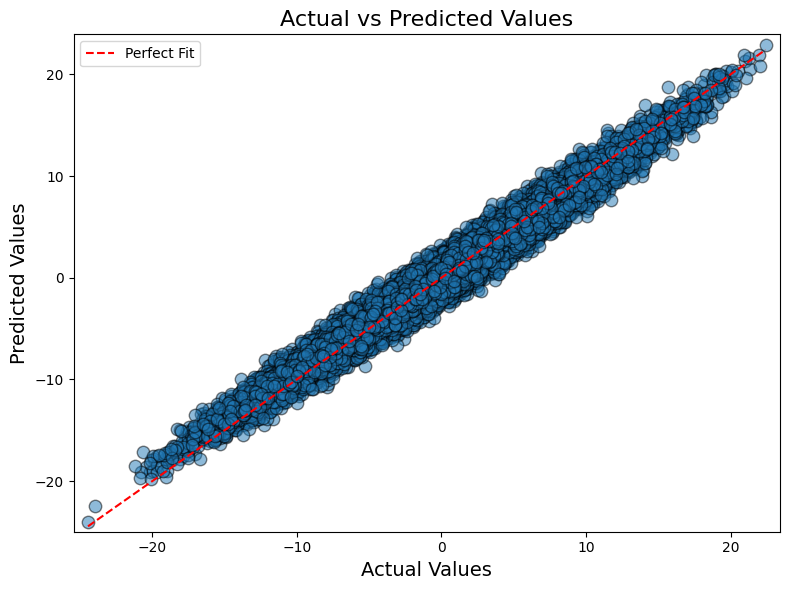

In [21]:
import matplotlib.pyplot as plt

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', s=80)

# Add a diagonal line for reference
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')

# Set labels and title
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Predicted Values', fontsize=14)
ax.set_title('Actual vs Predicted Values', fontsize=16)

# Adjust the axis limits to improve visibility
ax.set_xlim(min(y_test) - 1, max(y_test) + 1)
ax.set_ylim(min(y_pred) - 1, max(y_pred) + 1)

# Add a legend
ax.legend()

# Adjust the spacing between the plot and the edges
plt.tight_layout()

# Show the plot
plt.show()